Prétraitement des images

In [1]:
# Importation des bibliothéque
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fonction pour calculer les mesures
def calculate_metrics(image, filtered_image):
    mse = np.mean((image - filtered_image) ** 2)
    psnr = cv2.PSNR(image, filtered_image)
    mssim = ssim(image, filtered_image)
    mae = np.mean(np.abs(image - filtered_image))
    return mse, psnr, mssim, mae

In [3]:
# Chemin du répertoire contenant les images
directory = 'dataset/'

# Liste des images existantes
existing_images = []
for i in range(338, 475):
    filename = 'Opta-Tech_' + str(i) + '.jpg'
    image_path = os.path.join(directory, filename)
    if os.path.exists(image_path):
        existing_images.append(image_path)

In [4]:
# Listes pour stocker les résultats des caluculs des mmertics
images = []
mse_gaussian_list, psnr_gaussian_list, mssim_gaussian_list, mae_gaussian_list = [], [], [], []
mse_median_list, psnr_median_list, mssim_median_list, mae_median_list = [], [], [], []
mse_bilateral_list, psnr_bilateral_list, mssim_bilateral_list, mae_bilateral_list = [], [], [], []

In [5]:
# Boucler sur les images existantes
for image_path in existing_images:
    filename = os.path.basename(image_path)
    # Chargement de l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Filtre Gaussien
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
    mse_gaussian, psnr_gaussian, mssim_gaussian, mae_gaussian = calculate_metrics(image, gaussian_blur)

    # Filtre Médian
    median_blur = cv2.medianBlur(image, 5)
    mse_median, psnr_median, mssim_median, mae_median = calculate_metrics(image, median_blur)

    # Filtre Bilatéral
    bilateral_blur = cv2.bilateralFilter(image, 9, 75, 75)
    mse_bilateral, psnr_bilateral, mssim_bilateral, mae_bilateral = calculate_metrics(image, bilateral_blur)


    # Stockage des résultats dans les listes
    images.append(filename)
    mse_gaussian_list.append(mse_gaussian)
    psnr_gaussian_list.append(psnr_gaussian)
    mssim_gaussian_list.append(mssim_gaussian)
    mae_gaussian_list.append(mae_gaussian)

    mse_median_list.append(mse_median)
    psnr_median_list.append(psnr_median)
    mssim_median_list.append(mssim_median)
    mae_median_list.append(mae_median)

    mse_bilateral_list.append(mse_bilateral)
    psnr_bilateral_list.append(psnr_bilateral)
    mssim_bilateral_list.append(mssim_bilateral)
    mae_bilateral_list.append(mae_bilateral)


In [6]:
# Création d'un DataFrame avec les résultats
data = {
    'Image': images,
    'MSE Gaussien': mse_gaussian_list,
    'PSNR Gaussien': psnr_gaussian_list,
    'MSSIM Gaussien': mssim_gaussian_list,
    'MAE Gaussien': mae_gaussian_list,
    'MSE Médiane': mse_median_list,
    'PSNR Médiane': psnr_median_list,
    'MSSIM Médiane': mssim_median_list,
    'MAE Médiane': mae_median_list,
    'MSE Bilateral': mse_bilateral_list,
    'PSNR Bilateral': psnr_bilateral_list,
    'MSSIM Bilateral': mssim_bilateral_list,
    'MAE Bilateral': mae_bilateral_list,
}

In [7]:
df = pd.DataFrame(data)

In [8]:
# Exportation vers un fichier Excel
df.to_excel('resultats_mesures.xlsx', index = False)

In [9]:
# Calcul de la moyenne des mesures
df_metrics = df.drop('Image', axis = 1)
mean_metrics = df_metrics.mean()

print("Moyennes des mesures pour chaque filtre :")
print(mean_metrics)


Moyennes des mesures pour chaque filtre :
MSE Gaussien        0.589276
PSNR Gaussien      50.419205
MSSIM Gaussien      0.991625
MAE Gaussien       54.524289
MSE Médiane         1.200443
PSNR Médiane       47.388256
MSSIM Médiane       0.982812
MAE Médiane        70.385653
MSE Bilateral       2.347735
PSNR Bilateral     44.422834
MSSIM Bilateral     0.966975
MAE Bilateral      89.392954
dtype: float64


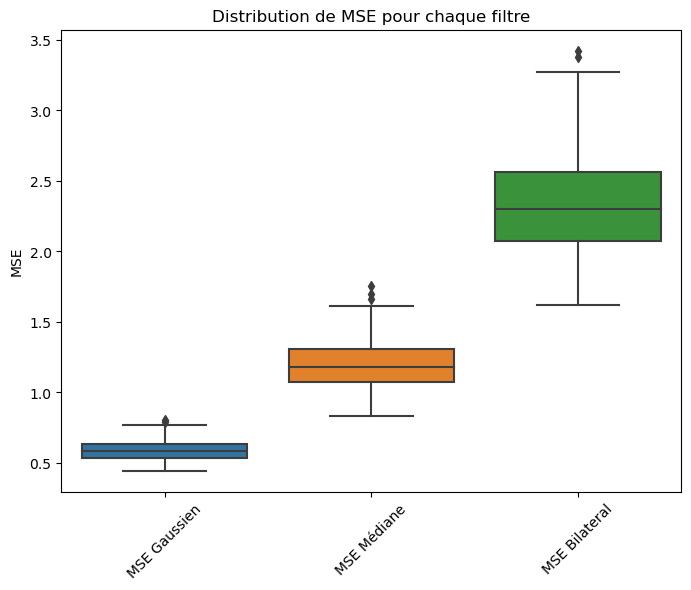

In [10]:
# Boxplot pour MSE
plt.figure(figsize = (8, 6))
sns.boxplot(data = df[['MSE Gaussien', 'MSE Médiane', 'MSE Bilateral']])
plt.ylabel('MSE')
plt.title('Distribution de MSE pour chaque filtre')
plt.xticks(rotation = 45)
plt.show()

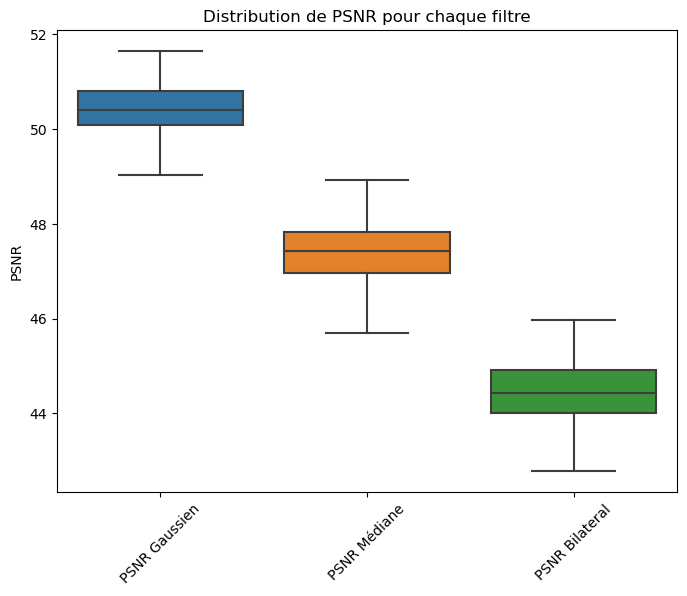

In [11]:
# Boxplot pour PSNR
plt.figure(figsize = (8, 6))
sns.boxplot(data = df[['PSNR Gaussien', 'PSNR Médiane', 'PSNR Bilateral']])
plt.ylabel('PSNR')
plt.title('Distribution de PSNR pour chaque filtre')
plt.xticks(rotation = 45)
plt.show()

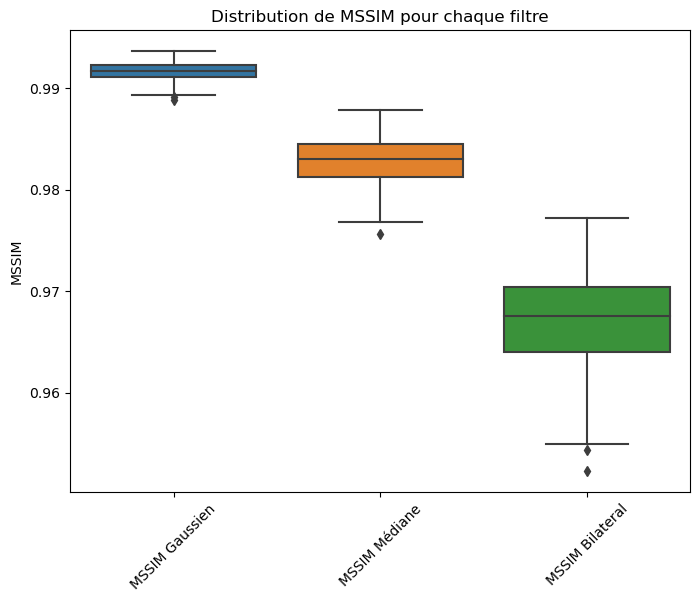

In [12]:
# Boxplot pour MSSIM
plt.figure(figsize = (8, 6))
sns.boxplot(data = df[['MSSIM Gaussien', 'MSSIM Médiane', 'MSSIM Bilateral']])
plt.ylabel('MSSIM')
plt.title('Distribution de MSSIM pour chaque filtre')
plt.xticks(rotation = 45)
plt.show()

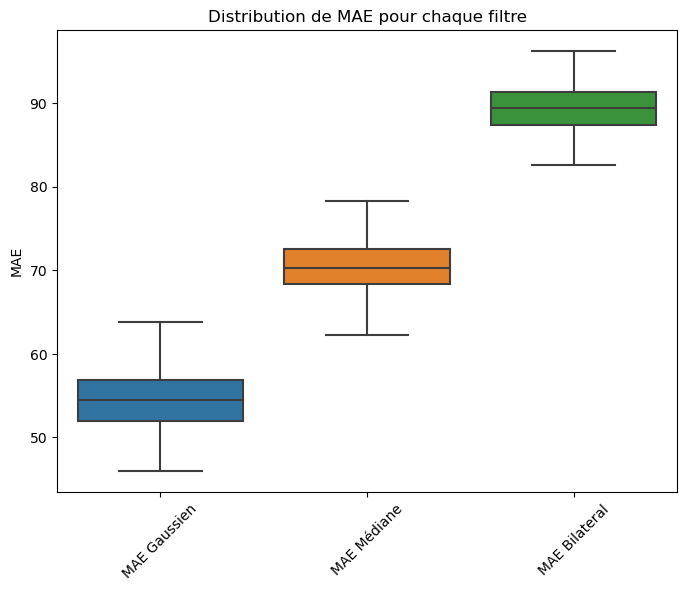

In [13]:
# Boxplot pour MAE
plt.figure(figsize = (8, 6))
sns.boxplot(data = df[['MAE Gaussien', 'MAE Médiane', 'MAE Bilateral']])
plt.ylabel('MAE')
plt.title('Distribution de MAE pour chaque filtre')
plt.xticks(rotation = 45)
plt.show()

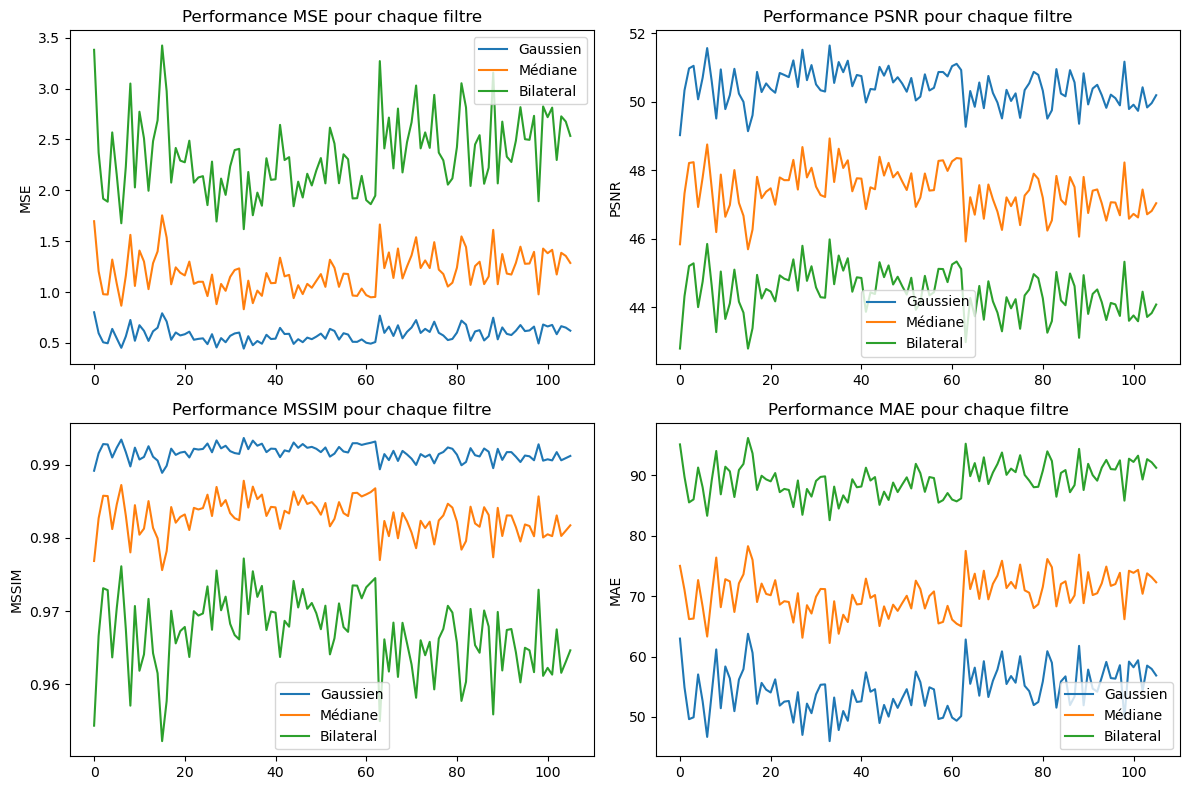

In [14]:
# Création des courbes de performance
plt.figure(figsize = (12, 8))
# MSE
plt.subplot(2, 2, 1)
plt.plot(df['MSE Gaussien'], label = 'Gaussien')
plt.plot(df['MSE Médiane'], label = 'Médiane')
plt.plot(df['MSE Bilateral'], label = 'Bilateral')

plt.ylabel('MSE')
plt.title('Performance MSE pour chaque filtre')
plt.legend()

# PSNR
plt.subplot(2, 2, 2)
plt.plot(df['PSNR Gaussien'], label = 'Gaussien')
plt.plot(df['PSNR Médiane'], label = 'Médiane')
plt.plot(df['PSNR Bilateral'], label = 'Bilateral')
plt.ylabel('PSNR')
plt.title('Performance PSNR pour chaque filtre')
plt.legend()

# MSSIM
plt.subplot(2, 2, 3)
plt.plot(df['MSSIM Gaussien'], label = 'Gaussien')
plt.plot(df['MSSIM Médiane'], label = 'Médiane')
plt.plot(df['MSSIM Bilateral'], label = 'Bilateral')
plt.ylabel('MSSIM')
plt.title('Performance MSSIM pour chaque filtre')
plt.legend()

# MAE
plt.subplot(2, 2, 4)
plt.plot(df['MAE Gaussien'], label = 'Gaussien')
plt.plot(df['MAE Médiane'], label = 'Médiane')
plt.plot(df['MAE Bilateral'], label = 'Bilateral')
plt.ylabel('MAE')
plt.title('Performance MAE pour chaque filtre')
plt.legend()

plt.tight_layout()
plt.show()


Segmentation des images

In [2]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt
import skimage.morphology, skimage.data
from skimage import io,color
from scipy import ndimage

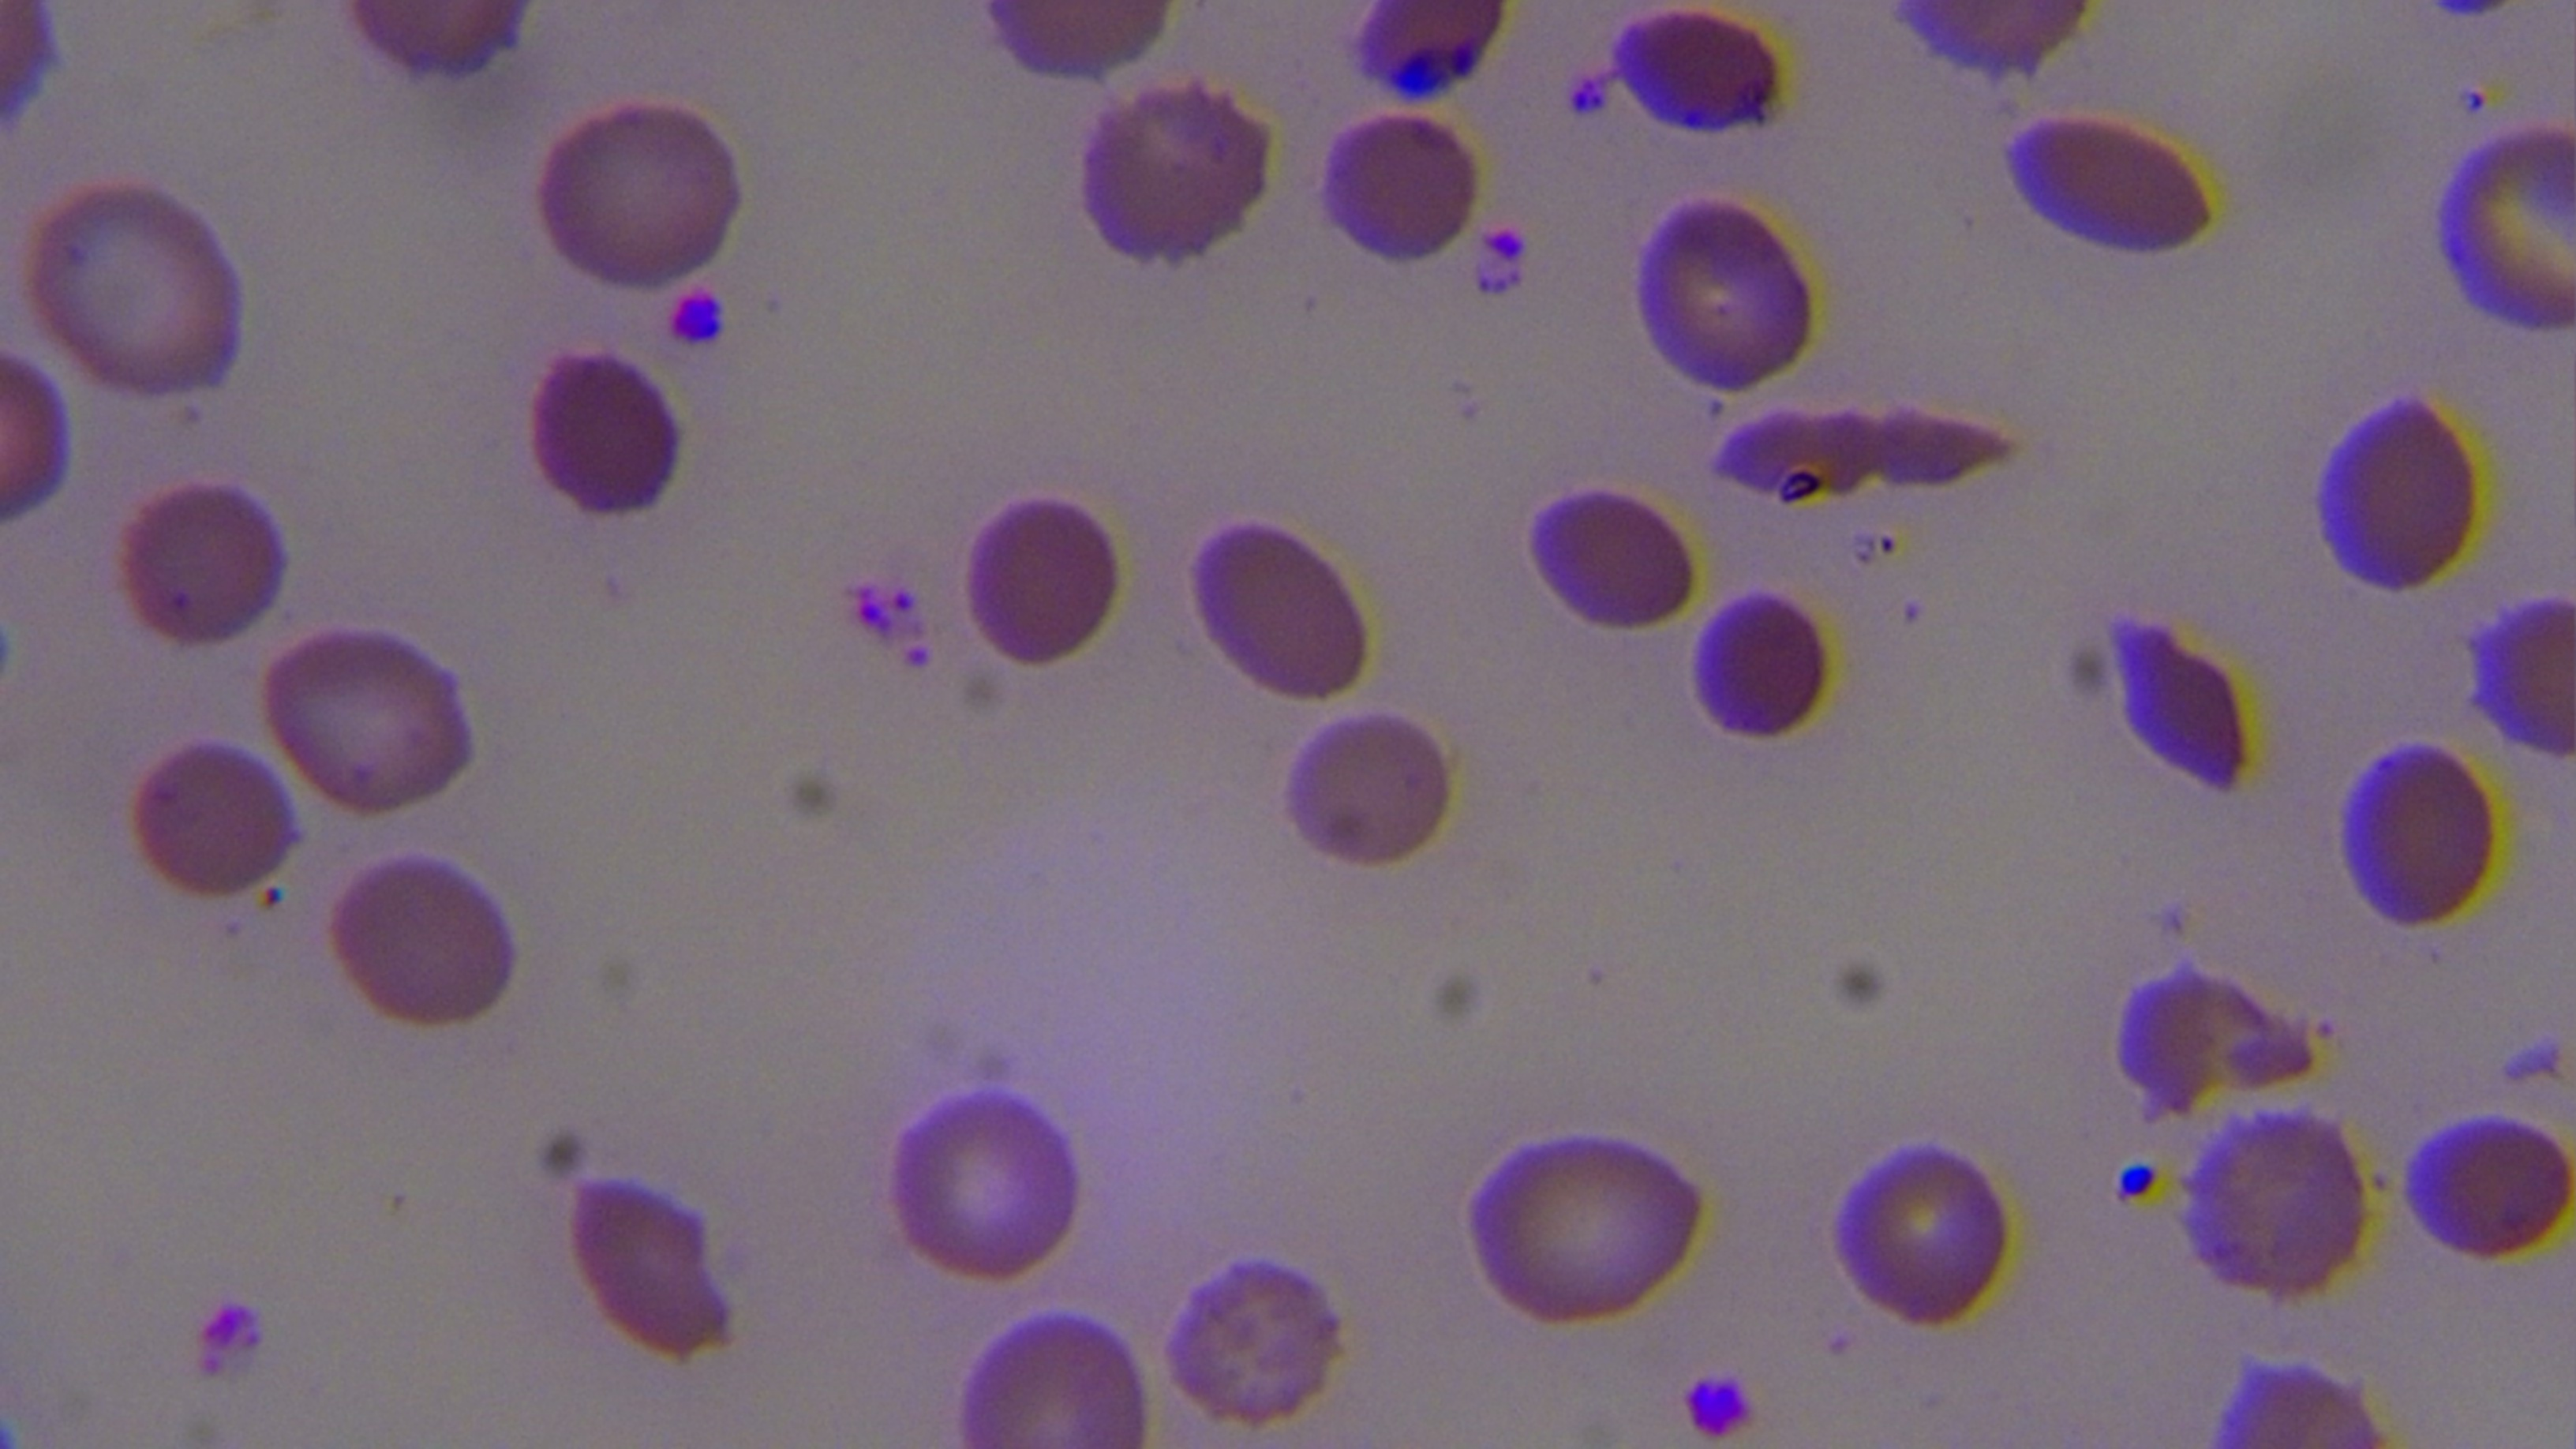

In [34]:
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')


# Image loading
img = cv2.imread("dataset-clean/Opta-Tech_345.jpg")
# Show image
imshow(img)

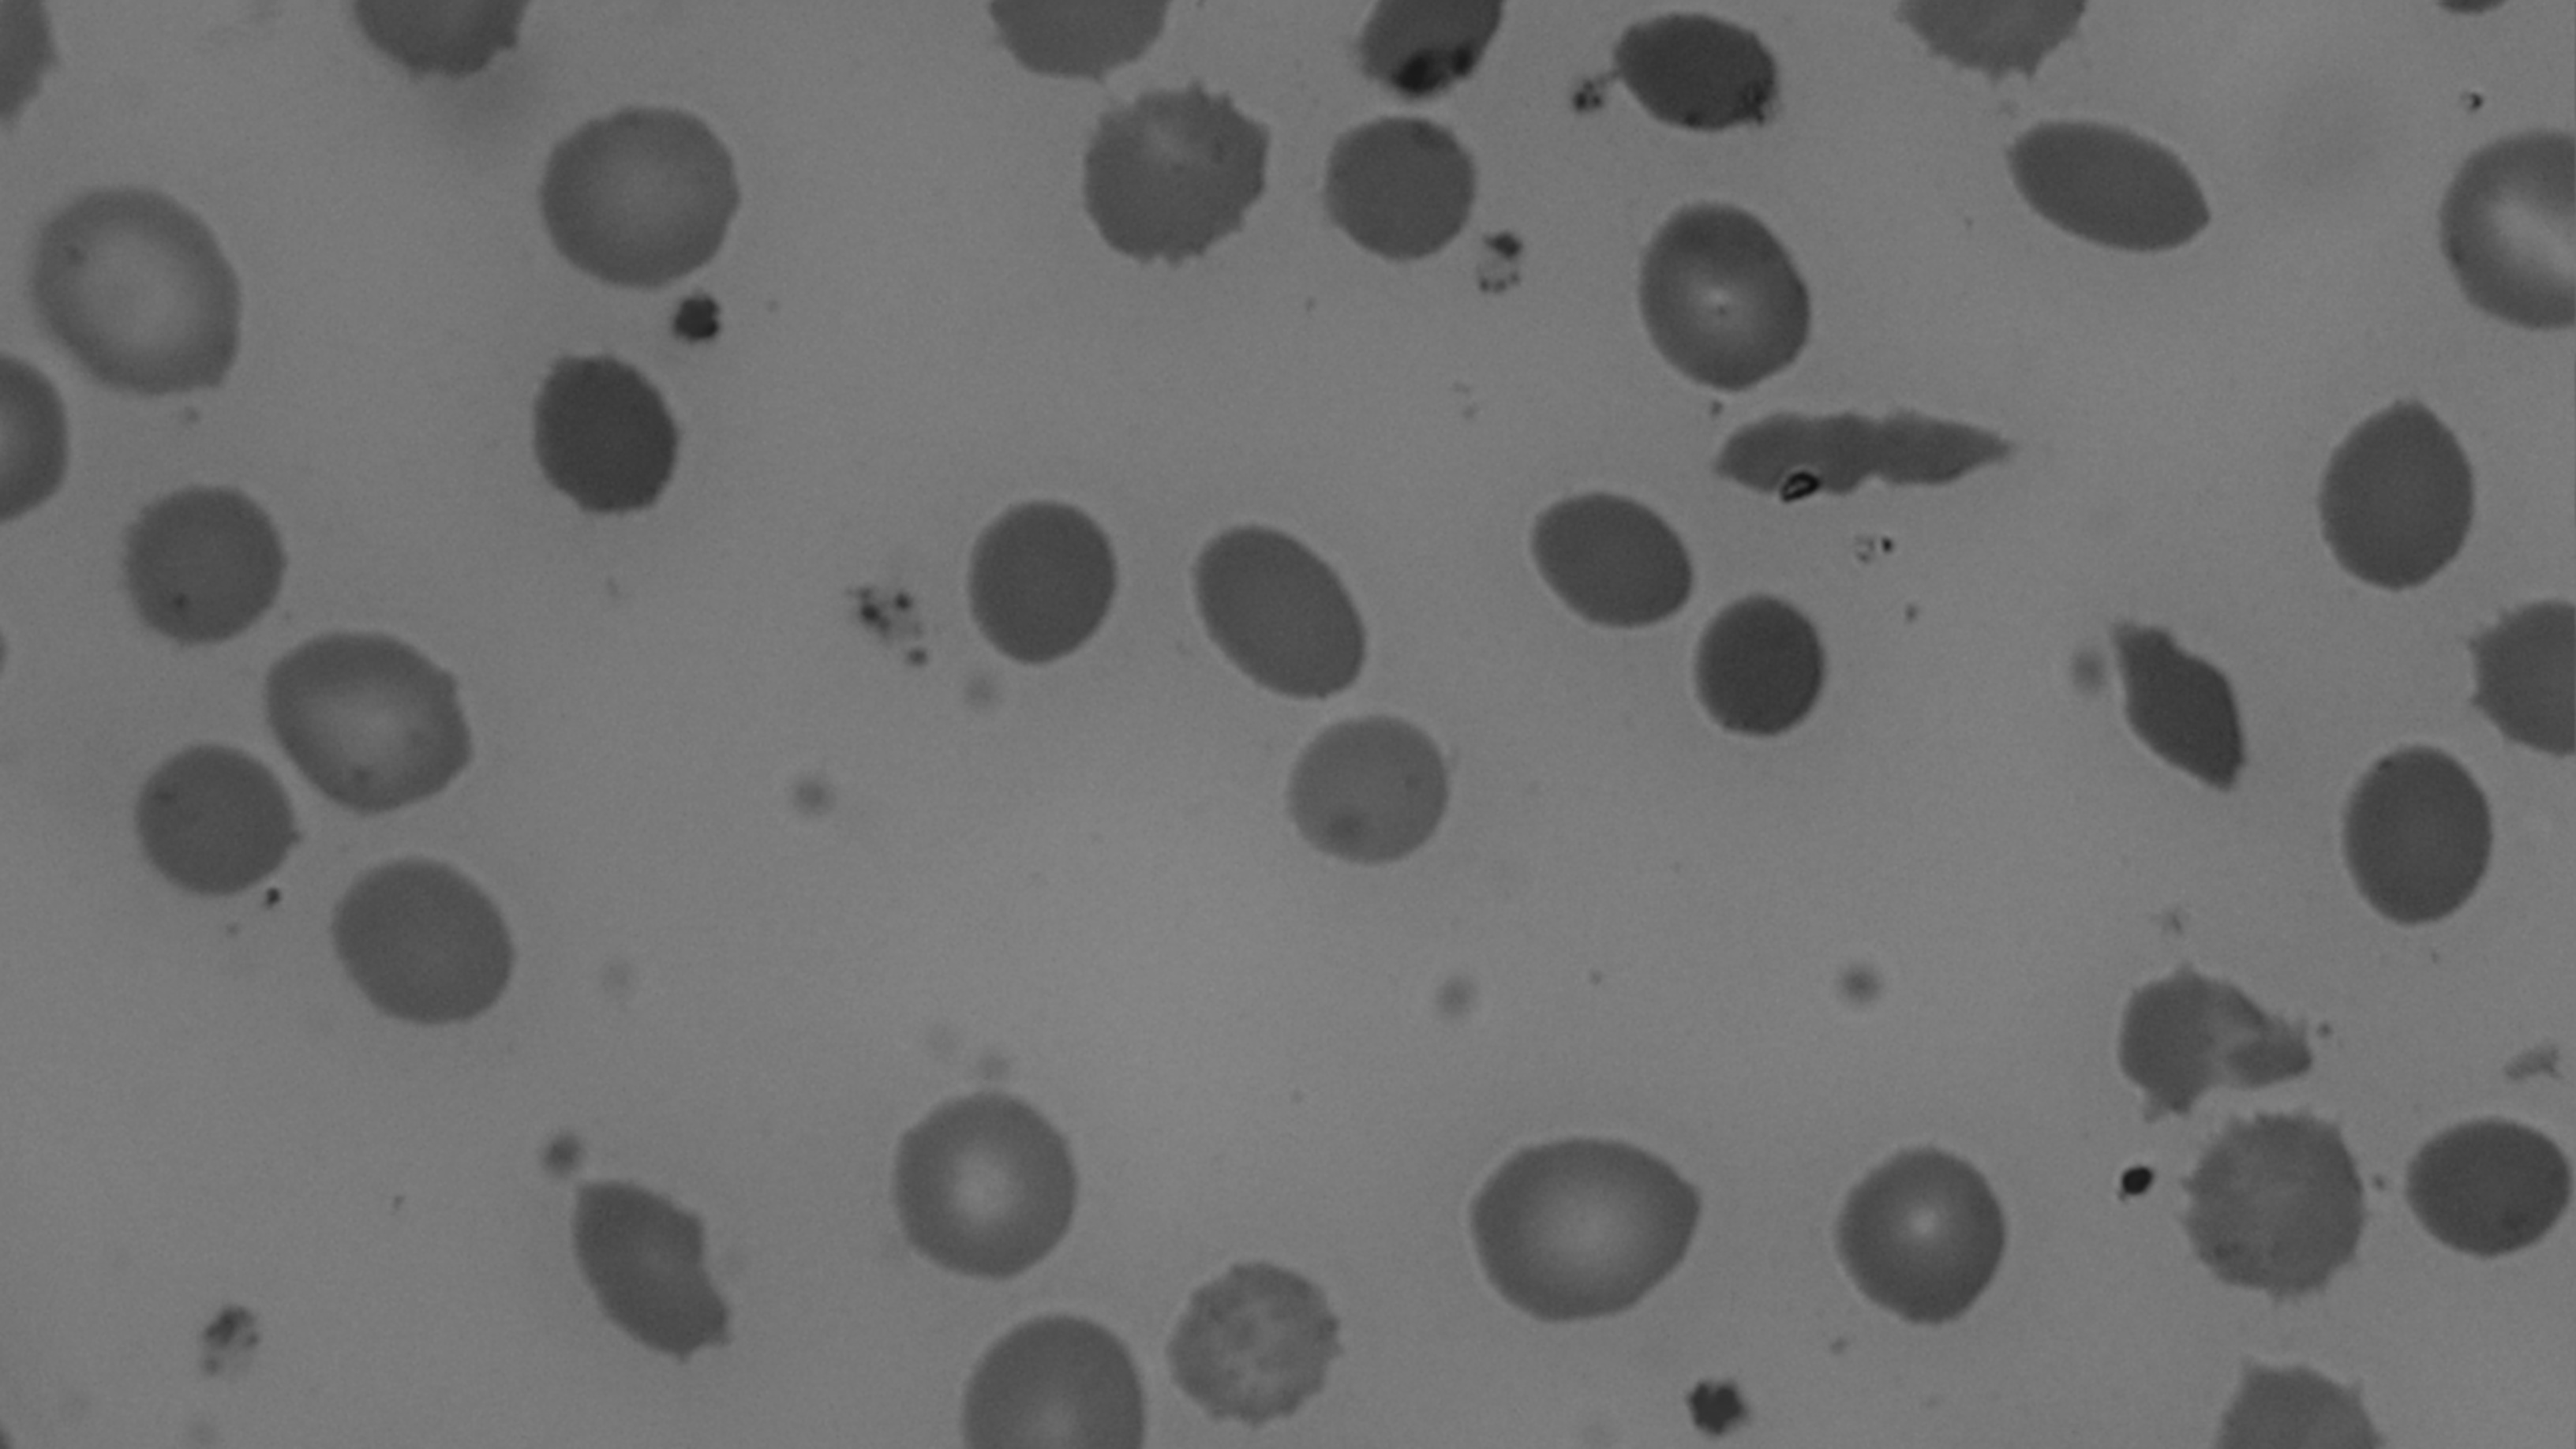

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

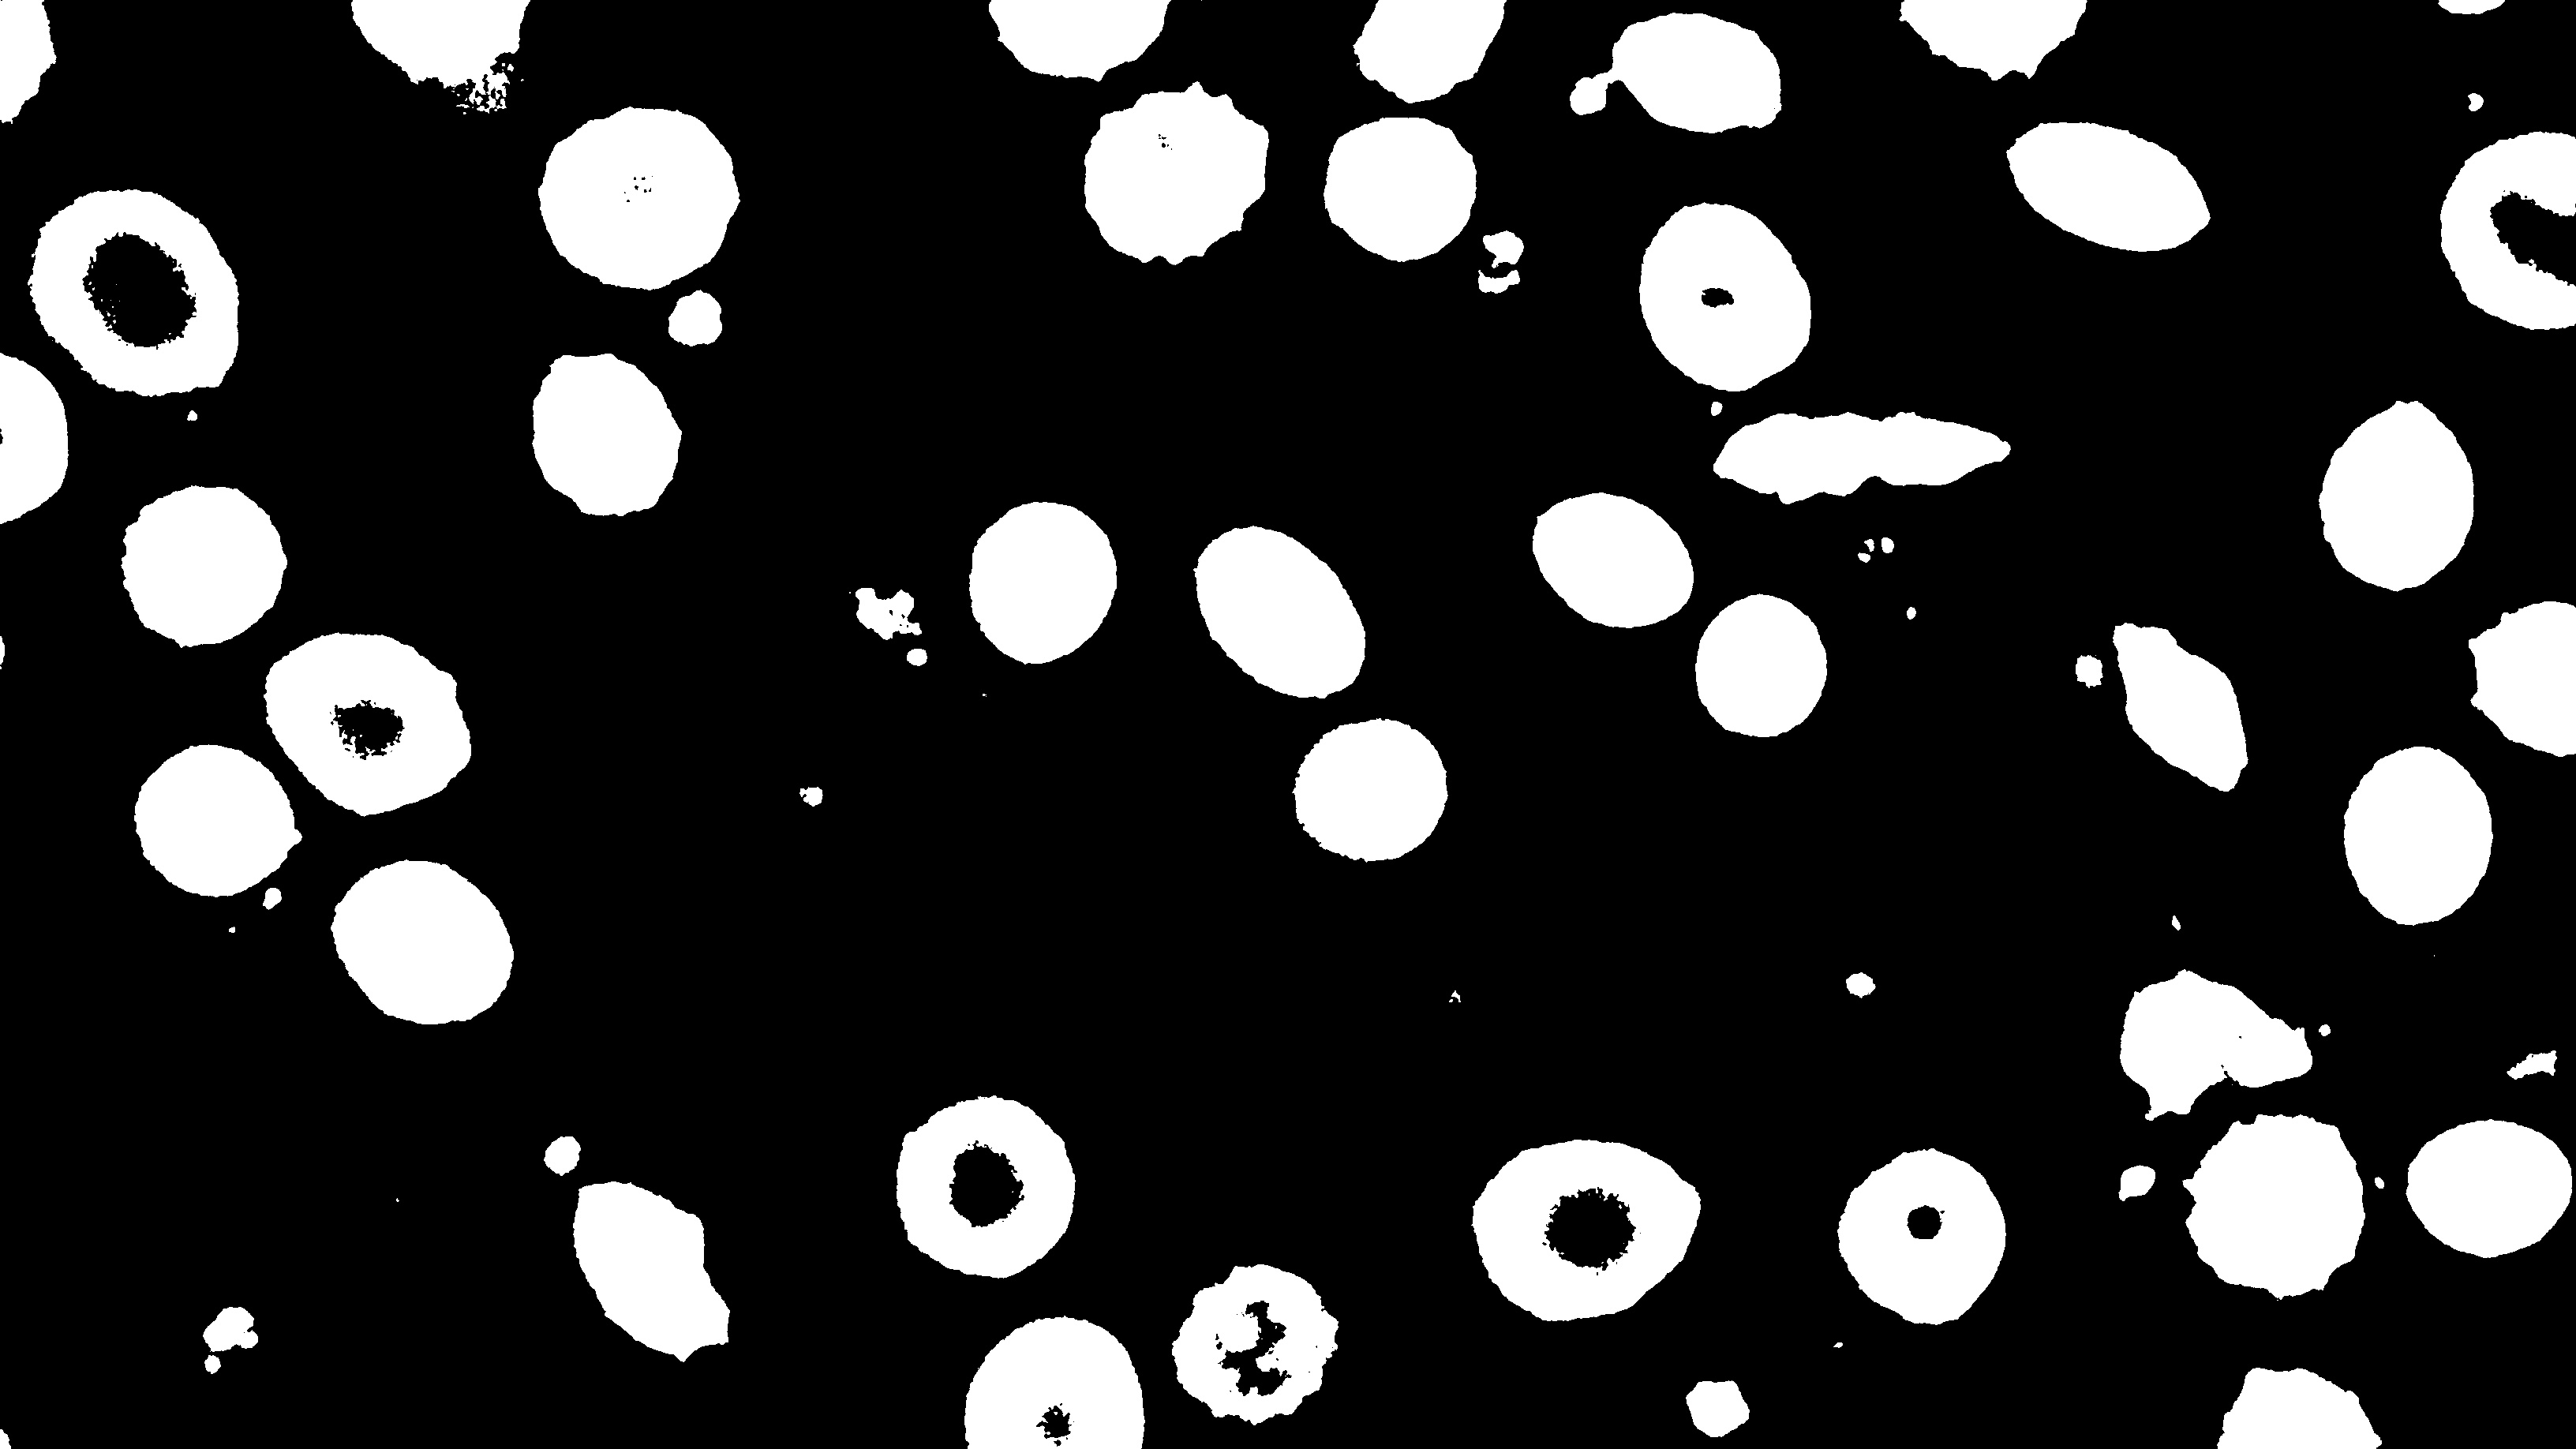

In [36]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
                             0, 255,
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

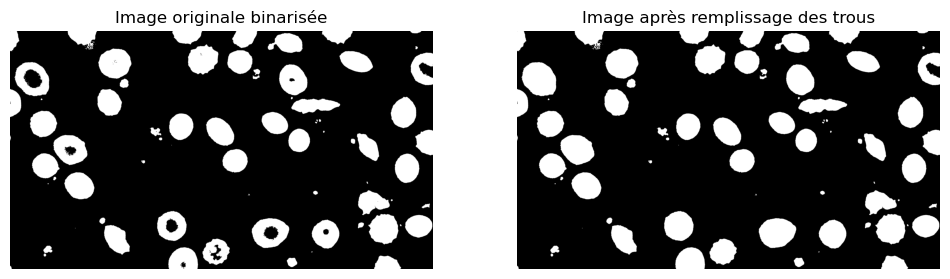

In [37]:
filled_image = ndimage.binary_fill_holes(bin_img)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(bin_img, cmap=plt.cm.gray)
ax[0].set_title('Image originale binarisée')

ax[1].imshow(filled_image, cmap=plt.cm.gray)
ax[1].set_title('Image après remplissage des trous')

for a in ax:
    a.axis('off')

plt.show() 

In [8]:
from skimage.segmentation import clear_border
opening = clear_border(filled_image)
opening = opening.astype('uint8')  
#opening *= 255 

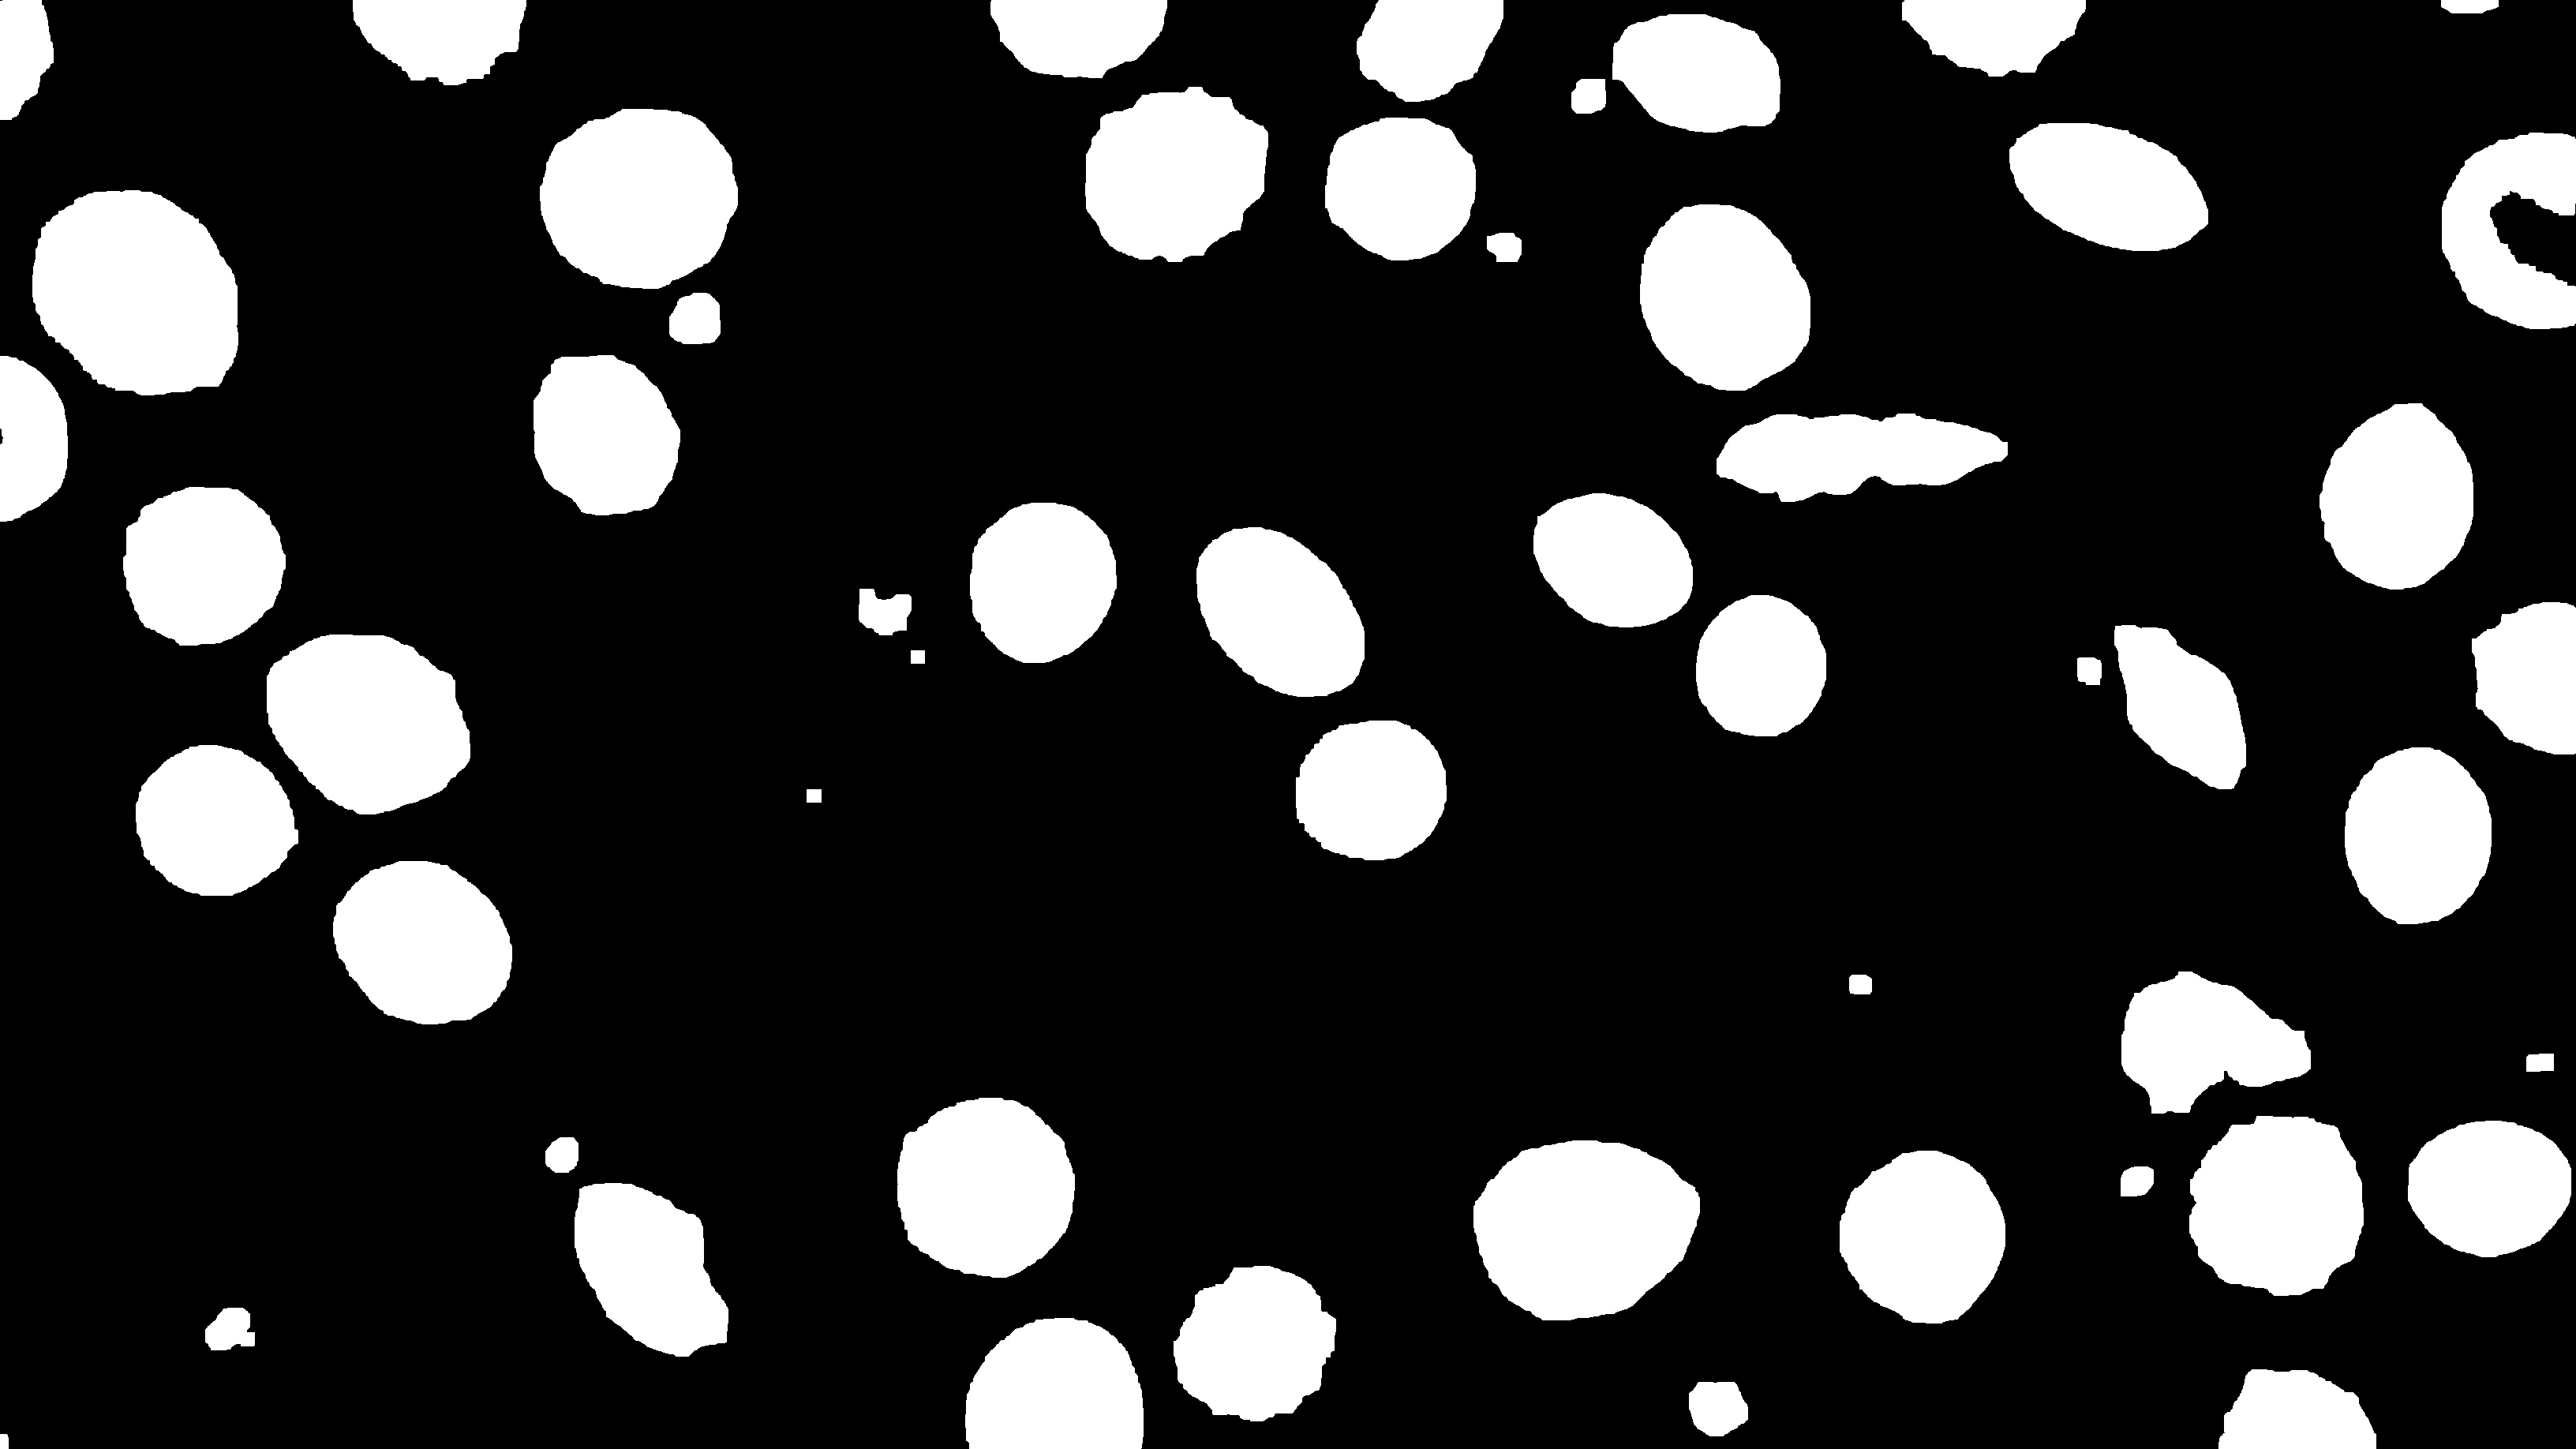

In [38]:
# opérations morphologiques
filled_image = filled_image.astype('uint8')  
filled_image *= 255 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
bin_img = cv2.morphologyEx(filled_image,
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=4)
imshow(bin_img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Unknown')

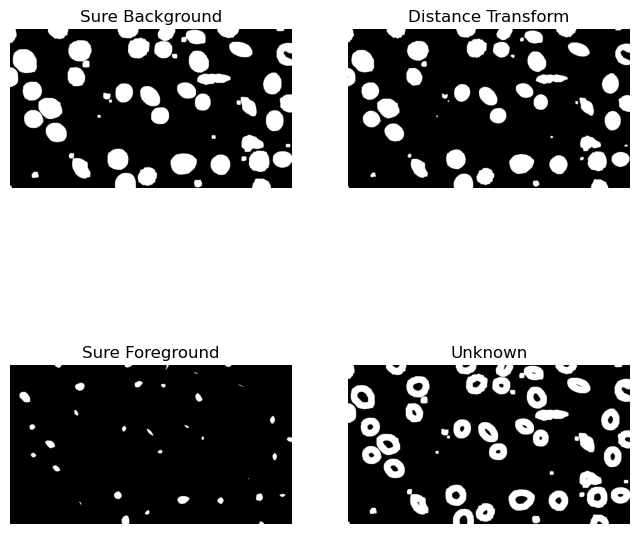

In [39]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=4)
imshow(sure_bg, axes[0, 0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0, 1])
axes[0, 1].set_title('Distance Transform')

# foreground area
ret, sure_fg = cv2.threshold(dist, 0.60 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
imshow(sure_fg, axes[1, 0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1, 1])
axes[1, 1].set_title('Unknown')

#plt.show()

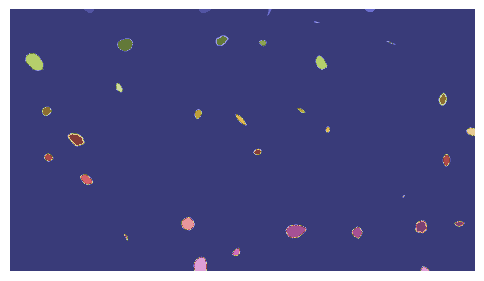

In [40]:
# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

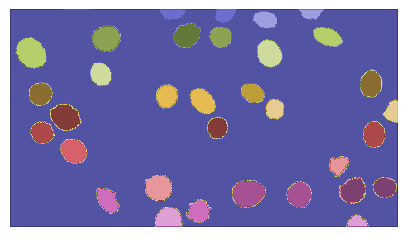

In [41]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

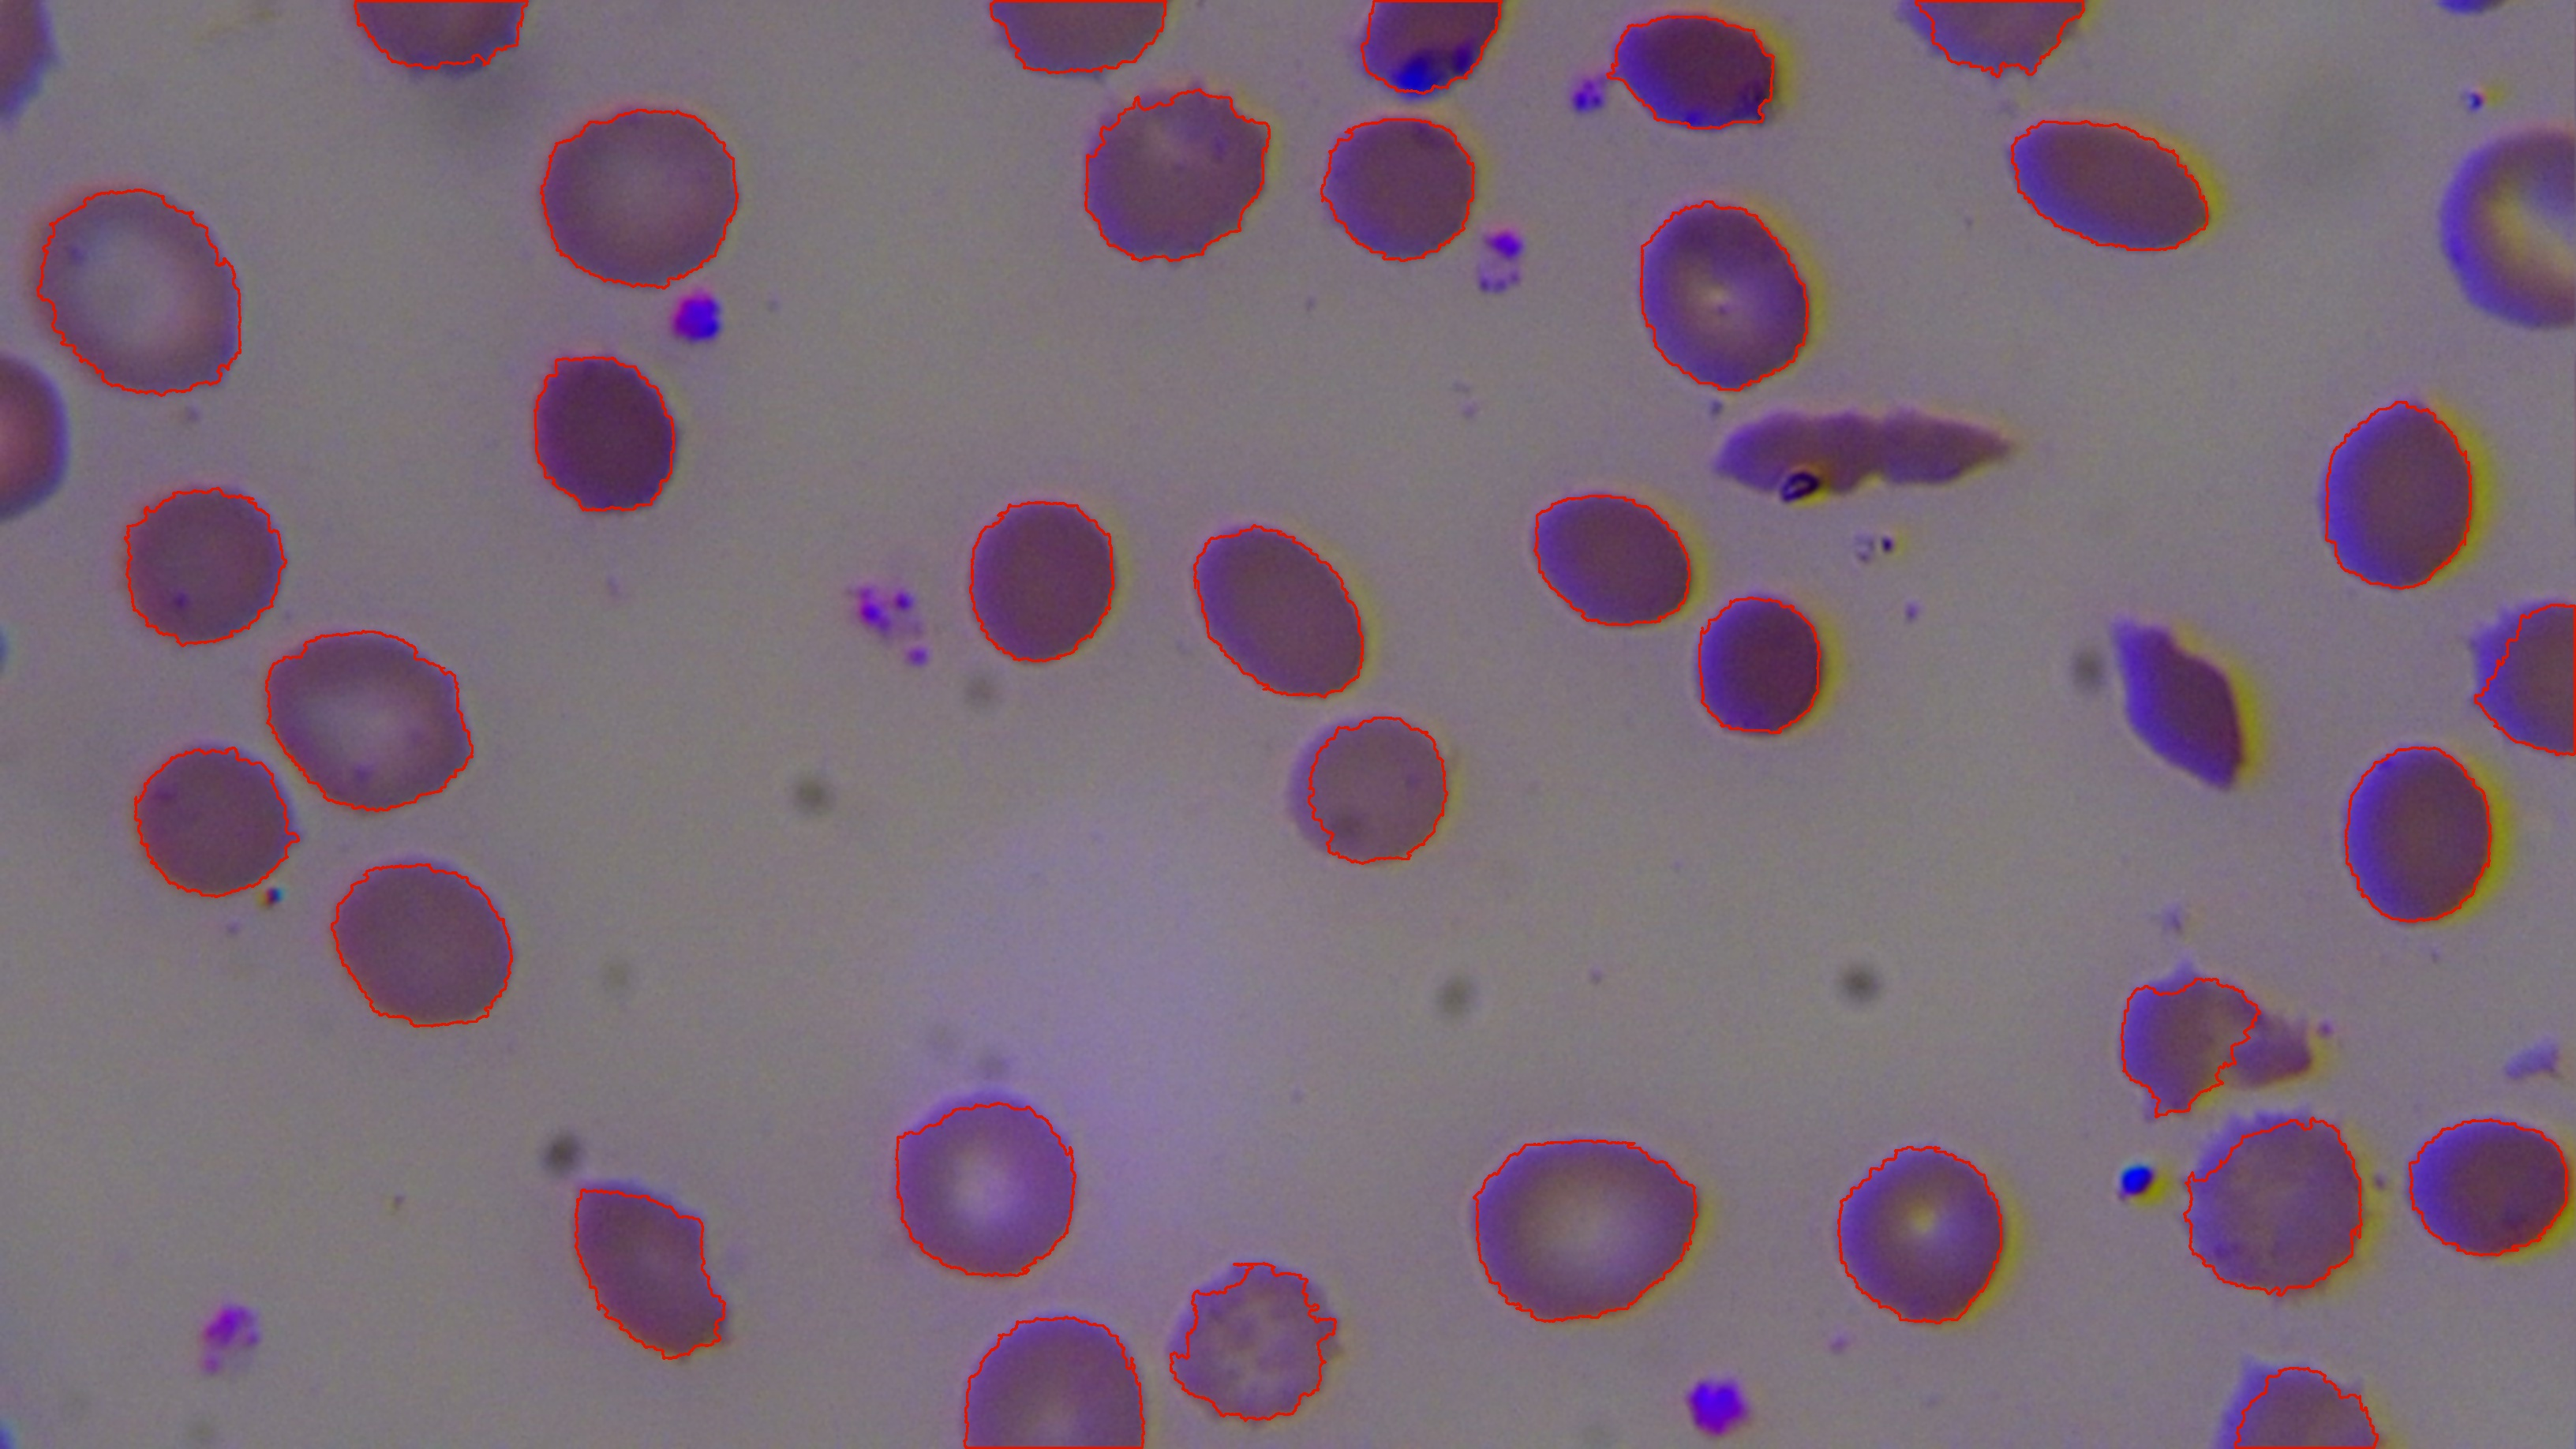

In [42]:
labels = np.unique(markers)
 
coins = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])
 
# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)

L'extraction des cellules

In [43]:
cells = []

# Iterate through the labels starting from index 2
for label in range(2, labels.max() + 1):
    # Create a binary image where only the area of the label is in the foreground
    cell_mask = np.where(markers == label, 255, 0).astype(np.uint8)

    # Check if any pixels are present in the cell mask
    if np.any(cell_mask):
        # Get the bounding box of the cell
        x, y, w, h = cv2.boundingRect(cell_mask)

        # Extract the cell from the original image based on the bounding box
        cell_img = img[y:y+h, x:x+w]

        # Append the extracted cell image to the list
        cells.append(cell_img)
    else:
        print(f"No pixels present for label {label}")


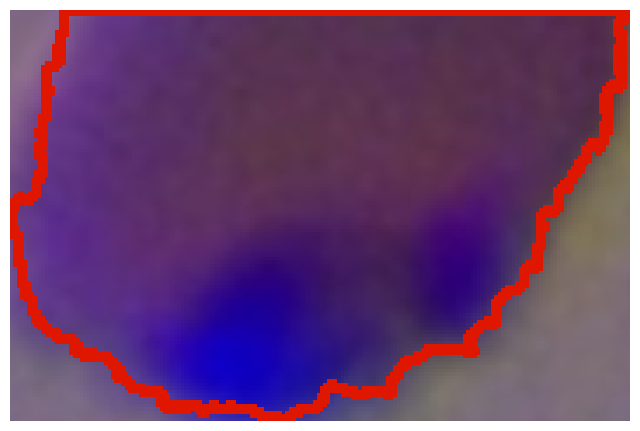

In [44]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cells[2], cv2.COLOR_BGR2RGB))  
plt.axis('off')
plt.show()

Extraction des caractéristique

In [45]:
import pandas as pd
from skimage import measure
from scipy.stats import entropy
import numpy as np

# Créer une liste de dictionnaires pour stocker les données
data = []

for i, cell in enumerate(cells):
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)

    # Convertir l'image en image binaire
    _, binary_cell = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Étiqueter l'image
    labels = measure.label(binary_cell)

    # Calculer les propriétés de région de l'image avec l'image d'intensité
    props = measure.regionprops(labels, intensity_image=gray)

    # Supposons qu'il n'y ait qu'une cellule par image, considérons la plus grande région (par aire) comme la cellule
    if len(props) > 0:
        prop = max(props, key=lambda x: x.area)

        minor_axis_length = prop.minor_axis_length if prop.minor_axis_length > 0 else 1e-10 # Pour éviter la division par zéro
        aspect_ratio = prop.major_axis_length / minor_axis_length
        eccentricity = prop.eccentricity
        circularity = 4*np.pi*prop.area / prop.perimeter**2
        std_dev = np.std(prop.intensity_image)
        variance = np.var(prop.intensity_image)
        entropy_value = entropy(prop.intensity_image.ravel())
        energy = np.sum(prop.intensity_image ** 2)
        
        # Ajouter les données à la liste
        data.append({'Cellule' : f'Cellule #{i+1}',
                     'Aspect Ratio' : aspect_ratio,
                     'Eccentricity' : eccentricity,
                     'Circularity' : circularity,
                     'Standard Deviation' : std_dev,
                     'Variance' : variance,
                     'Entropy' : entropy_value,
                     'Energy' : energy})

# Créer un DataFrame à partir de la liste de dictionnaires
df = pd.DataFrame(data)

Utilisation de KMeans pour prédir les label

In [46]:
from sklearn.cluster import KMeans
X = df[['Circularity', 'Aspect Ratio', 'Eccentricity', 'Standard Deviation', 'Variance', 'Entropy', 'Energy']].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['category'] = kmeans.predict(X)

/home/konteye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df

Cellule  Aspect Ratio  Eccentricity  Circularity  Standard Deviation  \
0    Cellule #1      1.887194      0.848068     0.345474           51.494960   
1    Cellule #2      2.001169      0.866194     0.296758           53.417827   
2    Cellule #3      1.995141      0.865321     0.318503           51.032987   
3    Cellule #4      1.774280      0.826042     0.472714           57.109053   
4    Cellule #5      1.890928      0.848721     0.415250           55.997996   
5    Cellule #6      2.031237      0.870419     0.246096           50.336988   
6    Cellule #7      1.965093      0.860836     0.331816           54.645772   
7    Cellule #8      1.910344      0.852047     0.358119           54.030381   
8    Cellule #9      2.091731      0.878320     0.252167           53.343025   
9   Cellule #10      1.274278      0.619802     0.342807           48.529453   
10  Cellule #11      1.924635      0.854422     0.315292           54.007660   
11  Cellule #12      1.942417      0.857297     0.365861           53.049117   
12  Cellule #13      1.915945      0.852985     0.322804           56.179617   
13  Cellule #14      1.988106      0.864291     0.225944           47.624212   
14  Cellule #15      1.893955      0.849247     0.320489           54.191666   
15  Cellule #16      1.923747      0.854276     0.304536           53.948551   
16  Cellule #17      1.943131      0.857410     0.299275           54.935253   
17  Cellule #18      1.991268      0.864756     0.322029           50.540635   
18  Cellule #19      2.222132      0.893019     0.342825           55.795809   
19  Cellule #20      1.208232      0.561236     0.189879           50.142329   
20  Cellule #21      2.006340      0.866936     0.223741           50.195974   
21  Cellule #22      2.714550      0.929673     0.308120           52.551950   
22  Cellule #23      1.940093      0.856926     0.348739           55.880067   
23  Cellule #24      1.968221      0.861314     0.293954           53.057461   
24  Cellule #25      2.118081      0.881531     0.360839           57.802321   
25  Cellule #26      1.165934      0.514181     0.469998           52.185221   
26  Cellule #27      1.844919      0.840360     0.378845           56.029762   
27  Cellule #28      2.043962      0.872146     0.335718           54.675748   
28  Cellule #29      1.118307      0.447650     0.321017           48.777939   
29  Cellule #30      1.912662      0.852436     0.285876           53.008416   
30  Cellule #31      1.980795      0.863208     0.313058           54.765543   
31  Cellule #32      1.924294      0.854366     0.394898           59.100877   
32  Cellule #33      1.940786      0.857037     0.212348           48.198043   
33  Cellule #34      1.914973      0.852823     0.303573           56.896757   

       Variance   Entropy   Energy  category  
0   2651.730867  7.504007   222346         0  
1   2853.464214  7.520746   206056         0  
2   2604.365770  7.972556   405302         0  
3   3261.443903  7.898656   353402         0  
4   3135.775571  7.998933   401346         0  
5   2533.812409  8.435628   599104         2  
6   2986.160366  8.121542   415517         0  
7   2919.282069  7.898962   327230         0  
8   2845.478316  8.436682   380090         0  
9   2355.107810  9.668347  1808570         1  
10  2916.827305  8.389001   509528         0  
11  2814.208863  7.735946   274487         0  
12  3156.149364  7.917310   209857         0  
13  2268.065540  8.080860   434069         0  
14  2936.736715  7.856320   258193         0  
15  2910.446108  7.665808   202562         0  
16  3017.881985  8.584250   409753         0  
17  2554.355804  7.063735   137820         0  
18  3113.172291  7.798654   269395         0  
19  2514.253137  8.736729   746640         2  
20  2519.635817  7.570562   152092         0  
21  2761.707431  7.920366   285953         0  
22  3122.581875  7.626191   158955         0  
23  2815.094186  8.278615   492656         0  
24  3341.108331  8.180744   3171

In [49]:
df['category'] = df['category'].replace({0: 'Circulaire', 1: 'Allongeé', 2: 'Autres'})

In [50]:
df

Cellule  Aspect Ratio  Eccentricity  Circularity  Standard Deviation  \
0    Cellule #1      1.887194      0.848068     0.345474           51.494960   
1    Cellule #2      2.001169      0.866194     0.296758           53.417827   
2    Cellule #3      1.995141      0.865321     0.318503           51.032987   
3    Cellule #4      1.774280      0.826042     0.472714           57.109053   
4    Cellule #5      1.890928      0.848721     0.415250           55.997996   
5    Cellule #6      2.031237      0.870419     0.246096           50.336988   
6    Cellule #7      1.965093      0.860836     0.331816           54.645772   
7    Cellule #8      1.910344      0.852047     0.358119           54.030381   
8    Cellule #9      2.091731      0.878320     0.252167           53.343025   
9   Cellule #10      1.274278      0.619802     0.342807           48.529453   
10  Cellule #11      1.924635      0.854422     0.315292           54.007660   
11  Cellule #12      1.942417      0.857297     0.365861           53.049117   
12  Cellule #13      1.915945      0.852985     0.322804           56.179617   
13  Cellule #14      1.988106      0.864291     0.225944           47.624212   
14  Cellule #15      1.893955      0.849247     0.320489           54.191666   
15  Cellule #16      1.923747      0.854276     0.304536           53.948551   
16  Cellule #17      1.943131      0.857410     0.299275           54.935253   
17  Cellule #18      1.991268      0.864756     0.322029           50.540635   
18  Cellule #19      2.222132      0.893019     0.342825           55.795809   
19  Cellule #20      1.208232      0.561236     0.189879           50.142329   
20  Cellule #21      2.006340      0.866936     0.223741           50.195974   
21  Cellule #22      2.714550      0.929673     0.308120           52.551950   
22  Cellule #23      1.940093      0.856926     0.348739           55.880067   
23  Cellule #24      1.968221      0.861314     0.293954           53.057461   
24  Cellule #25      2.118081      0.881531     0.360839           57.802321   
25  Cellule #26      1.165934      0.514181     0.469998           52.185221   
26  Cellule #27      1.844919      0.840360     0.378845           56.029762   
27  Cellule #28      2.043962      0.872146     0.335718           54.675748   
28  Cellule #29      1.118307      0.447650     0.321017           48.777939   
29  Cellule #30      1.912662      0.852436     0.285876           53.008416   
30  Cellule #31      1.980795      0.863208     0.313058           54.765543   
31  Cellule #32      1.924294      0.854366     0.394898           59.100877   
32  Cellule #33      1.940786      0.857037     0.212348           48.198043   
33  Cellule #34      1.914973      0.852823     0.303573           56.896757   

       Variance   Entropy   Energy    category  
0   2651.730867  7.504007   222346  Circulaire  
1   2853.464214  7.520746   206056  Circulaire  
2   2604.365770  7.972556   405302  Circulaire  
3   3261.443903  7.898656   353402  Circulaire  
4   3135.775571  7.998933   401346  Circulaire  
5   2533.812409  8.435628   599104      Autres  
6   2986.160366  8.121542   415517  Circulaire  
7   2919.282069  7.898962   327230  Circulaire  
8   2845.478316  8.436682   380090  Circulaire  
9   2355.107810  9.668347  1808570    Allongeé  
10  2916.827305  8.389001   509528  Circulaire  
11  2814.208863  7.735946   274487  Circulaire  
12  3156.149364  7.917310   209857  Circulaire  
13  2268.065540  8.080860   434069  Circulaire  
14  2936.736715  7.856320   258193  Circulaire  
15  2910.446108  7.665808   202562  Circulaire  
16  3017.881985  8.584250   409753  Circulaire  
17  2554.355804  7.063735   137820  Circulaire  
18  3113.172291  7.798654   269395  Circulaire  
19  2514.253137  8.736729   746640      Autres  
20  2519.635817  7.570562   152092  Circulaire  
21  2761.707431  7.920366   285953  Circulaire  
22  3122.581875  7.626191   158955  Circulaire  
23  2815.094186  8.278615   492

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(['category', 'Cellule'], axis=1)  # Sélectionnez toutes les colonnes sauf 'labels'
y = df['category']  # Sélectionnez seulement la colonne 'labels'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
y_train.unique()

array(['Circulaire', 'Allongeé', 'Autres'], dtype=object)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Make predictions
predictions = model.predict(X_test)

# Print Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, predictions))

# Create Classification Report
class_report = classification_report(y_test, predictions, output_dict=True)

# Convert Classification Report to DataFrame
report_df = pd.DataFrame(class_report).transpose()
report_df

Accuracy Score: 1.0


precision  recall  f1-score  support
Autres              1.0     1.0       1.0      1.0
Circulaire          1.0     1.0       1.0      6.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0      7.0
weighted avg        1.0     1.0       1.0      7.0

In [56]:
# Créer un objet SVM
from sklearn import svm
clf = svm.SVC()

# Entraîner le modèle avec les données d'entraînement
clf.fit(X_train, y_train)

# Prédire les labels pour les données de test
y_pred = clf.predict(X_test)
from sklearn import metrics

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Autres       1.00      1.00      1.00         1
  Circulaire       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [57]:
print("Exactitude:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average=None))  
print("Rappel:", metrics.recall_score(y_test, y_pred, average=None))  
print("F1 Score:", metrics.f1_score(y_test, y_pred, average=None)) 

Exactitude: 1.0
Precision: [1. 1.]
Rappel: [1. 1.]
F1 Score: [1. 1.]


In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Réel')

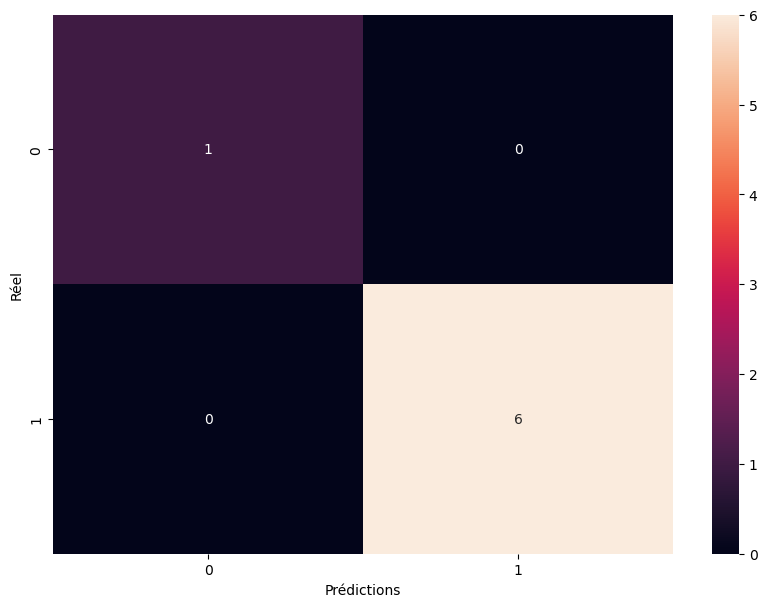

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Prédictions')
plt.ylabel('Réel')